# Importing the required libraries

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro

# Filtering out the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
d = pd.read_excel('titles.xlsx')
d.head(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


# Data summary

In [4]:
d.shape

(5840, 15)

In [5]:
d.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5840.000000,5840.000000,2100.000000,5367.000000,5.352000e+03,5752.000000,5536.000000
mean,2016.413527,76.945719,2.165238,6.510863,2.343938e+04,22.664172,6.828938
std,6.942481,38.998373,2.692221,1.163935,9.582047e+04,81.726489,1.170631
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.736750,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.829000,6.900000
75%,2020.000000,105.000000,2.000000,7.300000,9.494000e+03,16.620250,7.535250
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5840 non-null   object 
 1   title                 5840 non-null   object 
 2   type                  5840 non-null   object 
 3   description           5840 non-null   object 
 4   release_year          5840 non-null   int64  
 5   age_certification     3225 non-null   object 
 6   runtime               5840 non-null   int64  
 7   genres                5840 non-null   object 
 8   production_countries  5840 non-null   object 
 9   seasons               2100 non-null   float64
 10  imdb_id               5445 non-null   object 
 11  imdb_score            5367 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5752 non-null   float64
 14  tmdb_score            5536 non-null   float64
dtypes: float64(5), int64(

In [7]:
d.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

# Attributes

Columns:

- id: Helps to identify and differentiate each entry in the dataset.
- title: Names of the TV Shows and Movies.
- type: Tells us whether the searched keyword is a Movie or a Show.
- description: Summary of a Movie/TV Show.
- release_year: Rrelease year of each TV Show or Movie.
- age_certification: Indicates the appropriate age group for the content.
- runtime: The duration of the content.
- genres: Preferences to choose from.
- production_countries: Country of production.
- seasons: If the type == TV Show in the dataset, then the number of seasons is displayed.
- imdb_id: Each show or movie in the dataset is associated with a unique IMDb ID.
- imdb_score: It is a rating scale that allows users to rate Movies and TV Shows.
- imdb_votes: Number of people that have voted on IMDb.
- tmdb_popularity: TMDB dataset to measure the popularity of movies and TV shows. 
- tmdb_score: It is a rating scale that allows users to rate Movies and TV Shows. Similar to that of IMDb.

# Data Cleaning

In [8]:
d.isnull().sum()

id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       2615
runtime                    0
genres                     0
production_countries       0
seasons                 3740
imdb_id                  395
imdb_score               473
imdb_votes               488
tmdb_popularity           88
tmdb_score               304
dtype: int64

In [9]:
# Check for null values in all coulmns
d.isnull().sum().sort_values(ascending=False)

seasons                 3740
age_certification       2615
imdb_votes               488
imdb_score               473
imdb_id                  395
tmdb_score               304
tmdb_popularity           88
id                         0
title                      0
type                       0
description                0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64

# 1.Dropping Columns

In [10]:
d.drop('seasons', axis=1, inplace=True)

In [11]:
d.drop('imdb_id', axis=1, inplace=True) # As we cannot fill in any values using median, mode or mean therefore I am removing it as the values in the id have to be unique.

# 2.Filling in empty values

In [12]:
d['tmdb_popularity'].fillna(d['tmdb_popularity'].median(), inplace=True)
d.isnull().sum().sort_values(ascending=False)

age_certification       2615
imdb_votes               488
imdb_score               473
tmdb_score               304
id                         0
title                      0
type                       0
description                0
release_year               0
runtime                    0
genres                     0
production_countries       0
tmdb_popularity            0
dtype: int64

In [13]:
d['tmdb_score'].fillna(d['tmdb_score'].mean(), inplace=True)
d.isnull().sum().sort_values(ascending=False)

age_certification       2615
imdb_votes               488
imdb_score               473
id                         0
title                      0
type                       0
description                0
release_year               0
runtime                    0
genres                     0
production_countries       0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [14]:
d['imdb_score'].fillna(d['imdb_score'].mean(), inplace=True)
d.isnull().sum().sort_values(ascending=False)

age_certification       2615
imdb_votes               488
id                         0
title                      0
type                       0
description                0
release_year               0
runtime                    0
genres                     0
production_countries       0
imdb_score                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [15]:
d['imdb_votes'].fillna(d['imdb_votes'].mean(), inplace=True)
d.isnull().sum().sort_values(ascending=False)

age_certification       2615
id                         0
title                      0
type                       0
description                0
release_year               0
runtime                    0
genres                     0
production_countries       0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [16]:
d['age_certification'].fillna('Unknown', inplace=True) #Filled in the value 'Unknown' otherwise it will affect my analysis if I delete this particular column.
d.isnull().sum().sort_values(ascending=False)

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

# 3.Finding unique values

In [17]:
d.nunique()

id                      5840
title                   5789
type                       2
description             5837
release_year              63
age_certification         12
runtime                  202
genres                  1726
production_countries     452
imdb_score                81
imdb_votes              3881
tmdb_popularity         4888
tmdb_score               395
dtype: int64

## A. Removing invalid values

In [18]:
d.id.nunique()

5840

In [19]:
d.id.unique()

array(['ts300399', 'tm84618', 'tm154986', ..., 'tm1059008', 'tm1035612',
       'ts271048'], dtype=object)

In [20]:
d.title.nunique()

5789

In [21]:
d.title.unique()

array(['Five Came Back: The Reference Films', 'Taxi Driver',
       'Deliverance', ..., 'Lokillo',
       'Dad Stop Embarrassing Me - The Afterparty',
       'Mighty Little Bheem: Kite Festival'], dtype=object)

In [22]:
d.type.nunique()

2

In [23]:
d.type.unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [24]:
d.release_year.nunique()

63

In [25]:
d.release_year.unique()

array([1945, 1976, 1972, 1975, 1967, 1969, 1979, 1971, 1980, 1961, 1966,
       1954, 1958, 1977, 1963, 1956, 1960, 1973, 1974, 1959, 1978, 1989,
       1990, 1987, 1984, 1983, 1982, 1986, 1981, 1988, 1985, 2000, 1996,
       1997, 1995, 1994, 1999, 1998, 1993, 1992, 1991, 2008, 2002, 2010,
       2005, 2007, 2004, 2006, 2009, 2003, 2001, 2011, 2012, 2013, 2014,
       2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [26]:
d.age_certification.nunique()

12

In [27]:
d.age_certification.unique()

array(['TV-MA', 'R', 'PG', 'Unknown', 'TV-14', 'PG-13', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'G', 'NC-17'], dtype=object)

In [28]:
d.runtime.nunique()

202

In [29]:
d.runtime.unique()

array([ 51, 114, 109,  91, 150,  30,  94, 102, 110, 104, 158, 117,  78,
       115,  77,  97, 133, 129, 161, 186, 146, 100, 120,  74,  43, 124,
       131, 162, 142,  93, 135, 141,  24, 145, 139,  96, 119,  10,  23,
        26, 105,  90,  84, 116,  14, 123,  50,  87, 144,  81, 106, 174,
        72, 172,  80, 148, 170, 159, 125, 160, 151, 108,  48,  44, 127,
        22, 156, 103,  40, 194,  25, 107, 111,  46, 118, 191, 128,  28,
        89, 136, 112,  18,  21,  19,  45,   9, 185,  63, 206, 163,  75,
        49,  56, 175, 177,  88, 165,  58, 137,  61, 149,  60,  55, 126,
        57,  95,  42, 196, 101, 140,  92,  83,  47,  99, 143,  15, 121,
        98,  29,  82, 113,   7,  27, 224,  11, 208,  86,  36,  64,  17,
        76, 138, 210,  32, 214,  20, 189,  13, 157,  73, 166, 184, 225,
       155,  85,   3, 167,  31, 169, 179,  67, 190,   0, 132, 192, 122,
       130,  59, 134, 182, 153, 173,  69,  37,  16,  65,  54,  53,  41,
         2,   6,   4,  68,  66,  70,   5,  52, 240, 152,  79,  3

In [30]:
d.genres.nunique()

1726

In [31]:
d.genres.unique()

array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

In [32]:
d.production_countries.nunique()

452

In [33]:
d.production_countries.unique()

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

# Data Exploration

In [34]:
d.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5840.000000,5840.000000,5840.000000,5.840000e+03,5840.000000,5840.000000
mean,2016.413527,76.945719,6.510863,2.343938e+04,22.425560,6.828938
std,6.942481,38.998373,1.115796,9.172897e+04,81.131240,1.139750
min,1945.000000,0.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,5.900000,6.027500e+02,2.775000,6.200000
50%,2018.000000,83.000000,6.510863,2.792000e+03,6.829000,6.828938
75%,2020.000000,105.000000,7.300000,1.759625e+04,16.274750,7.500000
max,2022.000000,240.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [35]:
# Checking the shape after performing Data Cleaning
d.shape

(5840, 13)

# Univariate Analysis

## 1. What is the distribution of movies and TV shows on Netflix? Which category dominates the platform?

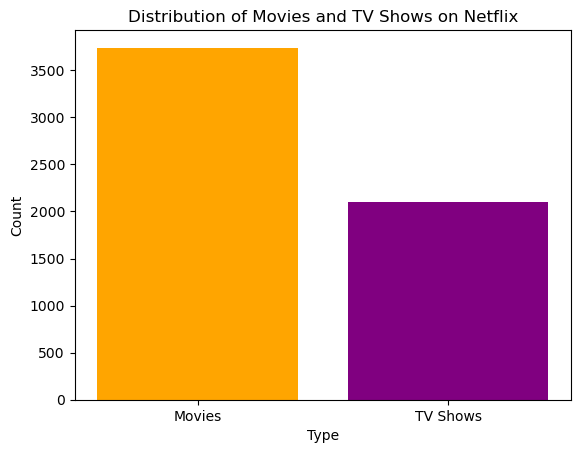

In [41]:
movies = d[d.type == "MOVIE"].shape[0]
tv_shows = d[d.type == "SHOW"].shape[0]

labels = ["Movies", "TV Shows"]
counts = [movies, tv_shows]
plt.bar(labels, counts, color=['orange', 'purple'])
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## 2. What is the distribution of Movies and TV Shows Release Over the Years?

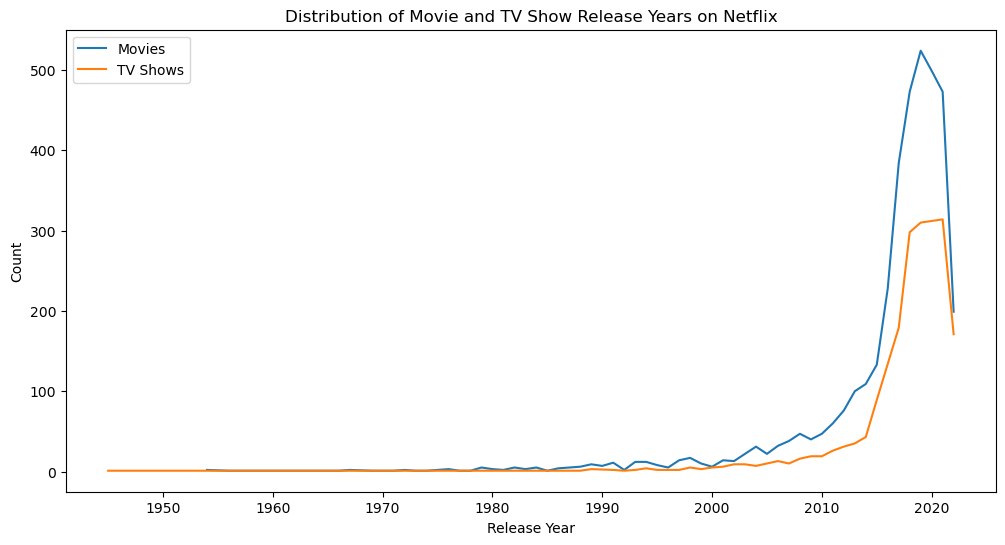

In [43]:
movies = d[d["type"] == "MOVIE"]
tv_shows = d[d["type"] == "SHOW"]

movie_release_years = movies["release_year"].value_counts().sort_index()
tv_show_release_years = tv_shows["release_year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(movie_release_years.index, movie_release_years.values, label="Movies")
plt.plot(tv_show_release_years.index, tv_show_release_years.values, label="TV Shows")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Movie and TV Show Release Years on Netflix")
plt.legend()
plt.show()

## 3. What is the variation of runtime and how many movies?

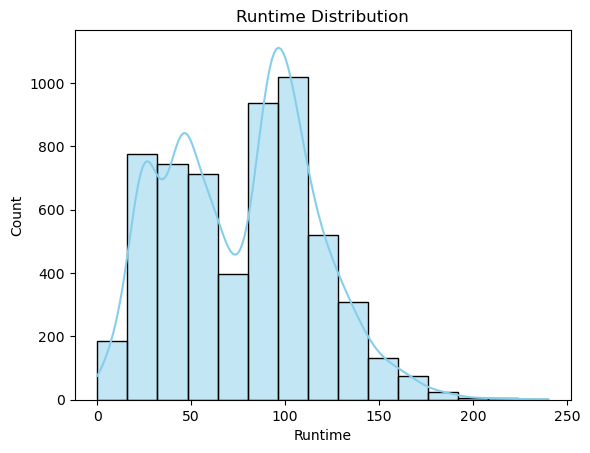

In [47]:
sns.histplot(d['runtime'], bins=15, kde=True, color='skyblue')
plt.title('Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.show()

## 4. What is the percentage(%) distribution of age rating in Netflix?

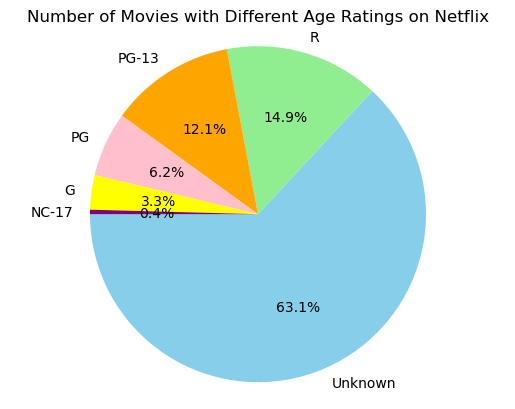

In [48]:
age_ratings = movies["age_certification"].value_counts()

labels = age_ratings.index
sizes = age_ratings.values
colors = ["skyblue", "lightgreen", "orange", "pink", "yellow", "purple"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Number of Movies with Different Age Ratings on Netflix")
plt.axis("equal")
plt.show()

In [81]:
# This is one of the drawback of this dataset as half of the age rating is not provided

## 5. What is the average rating given to Movies and TV Shows using IMDb rating?

<Axes: ylabel='imdb_score'>

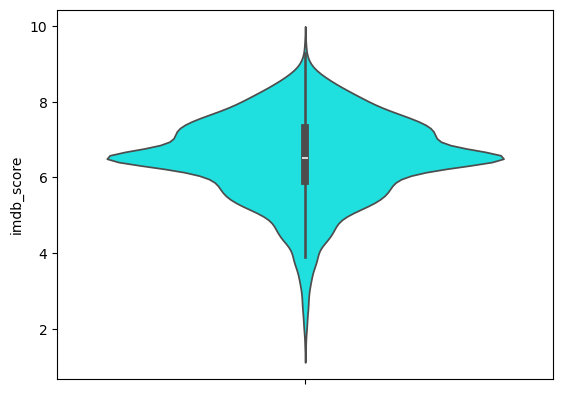

In [100]:
sns.violinplot(d.imdb_score, palette=["cyan"])

# Bivariate Analysis

## 1. Number of Movies and TV Shows released over the year on Netflix?

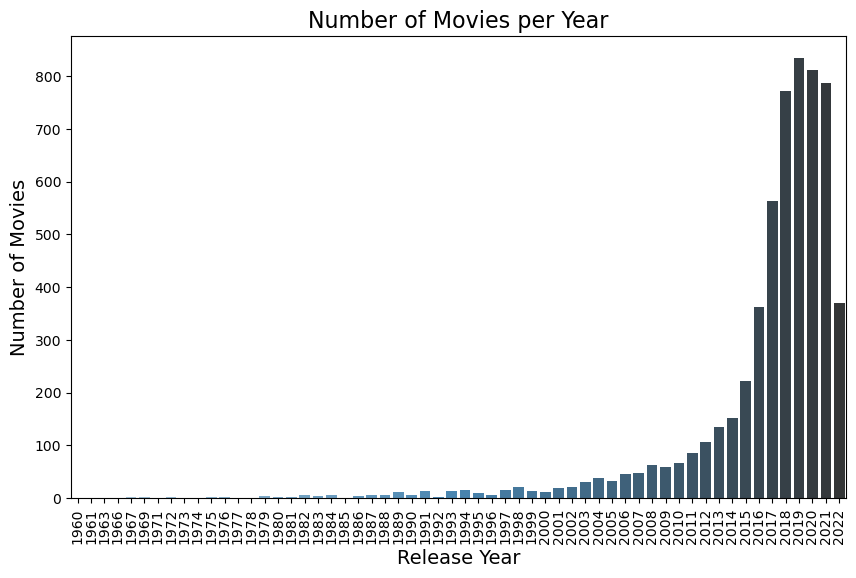

In [60]:
df_year = d.copy()
df_year['RELEASE_YEAR_START'] = df_year['release_year']
df_year['RELEASE_YEAR_END'] = df_year['release_year']

df_year = df_year[(df_year['RELEASE_YEAR_START'].astype(int) >= 1960) & (df_year['RELEASE_YEAR_END'].astype(int) <= 2022)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_year, x='RELEASE_YEAR_START', palette='Blues_d')
plt.title('Number of Movies per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## 2. What is the comparison of ratings between IMDb and TMDb?

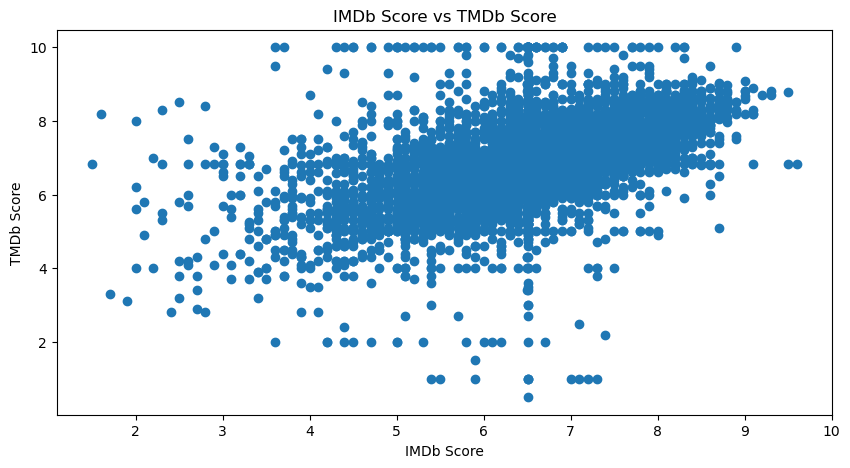

In [73]:
plt.figure(figsize = [10,5])
plt.scatter(d.imdb_score,d.tmdb_score)
plt.title("IMDb Score vs TMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDb Score")
plt.show()

## 3. What is the Average Rating of Movies and Shows depending on their genres?

In [76]:
d.groupby("genres")['imdb_score'].mean()

genres
['action', 'animation', 'comedy', 'drama', 'family', 'fantasy', 'music', 'romance']    7.700000
['action', 'animation', 'comedy', 'drama', 'family', 'scifi']                          6.250000
['action', 'animation', 'comedy', 'family', 'fantasy']                                 7.150000
['action', 'animation', 'comedy', 'family', 'music']                                   6.000000
['action', 'animation', 'comedy', 'family']                                            6.802716
                                                                                         ...   
['western', 'history', 'drama']                                                        6.500000
['western', 'horror', 'action']                                                        6.000000
['western', 'thriller', 'horror']                                                      5.500000
['western']                                                                            6.510863
[]                               

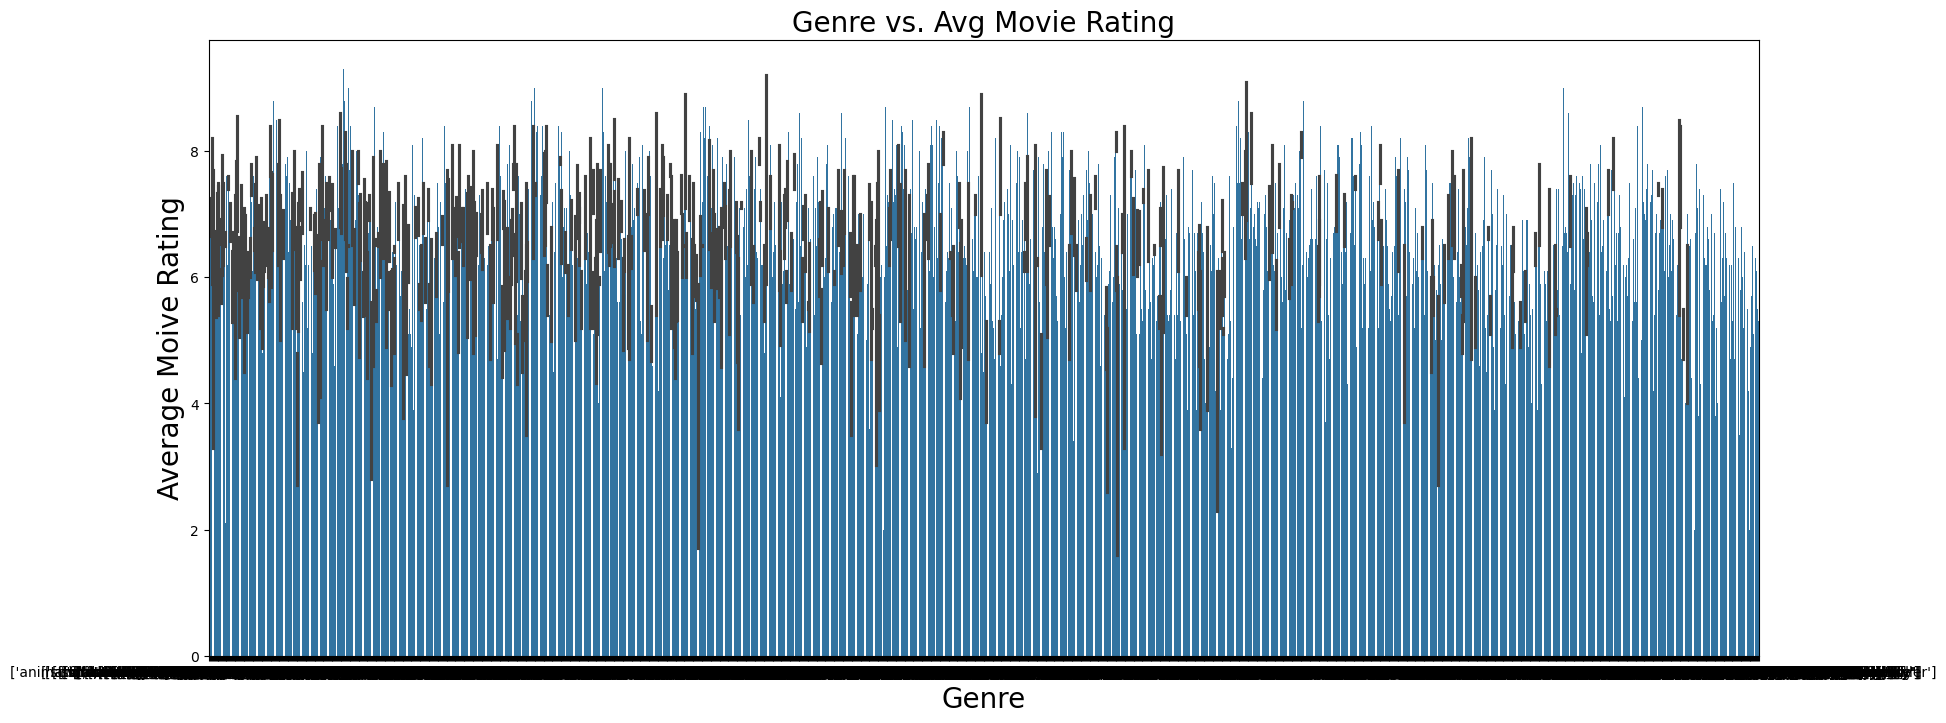

In [80]:
plt.figure(figsize=(20,8))
sns.barplot(x="genres",y="imdb_score",data=d)
plt.title("Genre vs. Avg Movie Rating",fontsize = 20)
plt.ylabel('Average Moive Rating',fontsize = 20)
plt.xlabel('Genre',fontsize = 20)
plt.show()

In [82]:
# Another drawback from this particular dataset

## 4. Which has better Average rating: Movies or TV Shows?

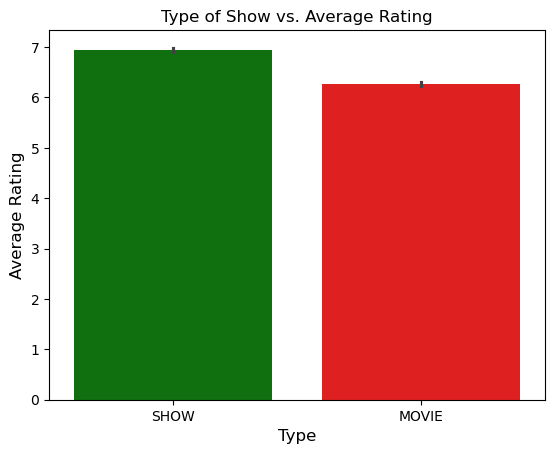

In [91]:
sns.barplot(x="type", y="imdb_score", data=d, hue="type", palette=["green", "red"])

plt.title("Type of Show vs. Average Rating", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xlabel("Type", fontsize=12)
plt.show()

<Axes: xlabel='type', ylabel='imdb_score'>

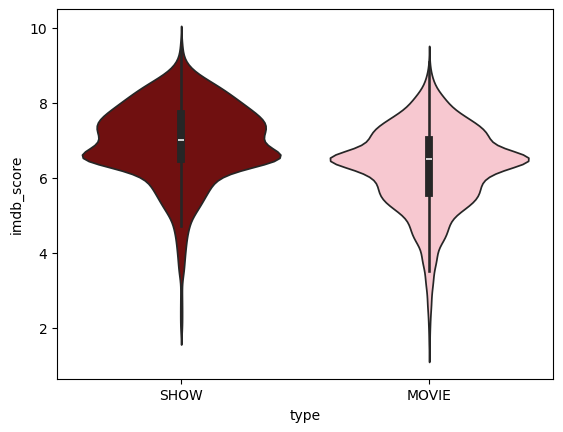

In [99]:
sns.violinplot(x='type', y='imdb_score', data=d, palette=["maroon", "pink"])

# Multivariate Analysis

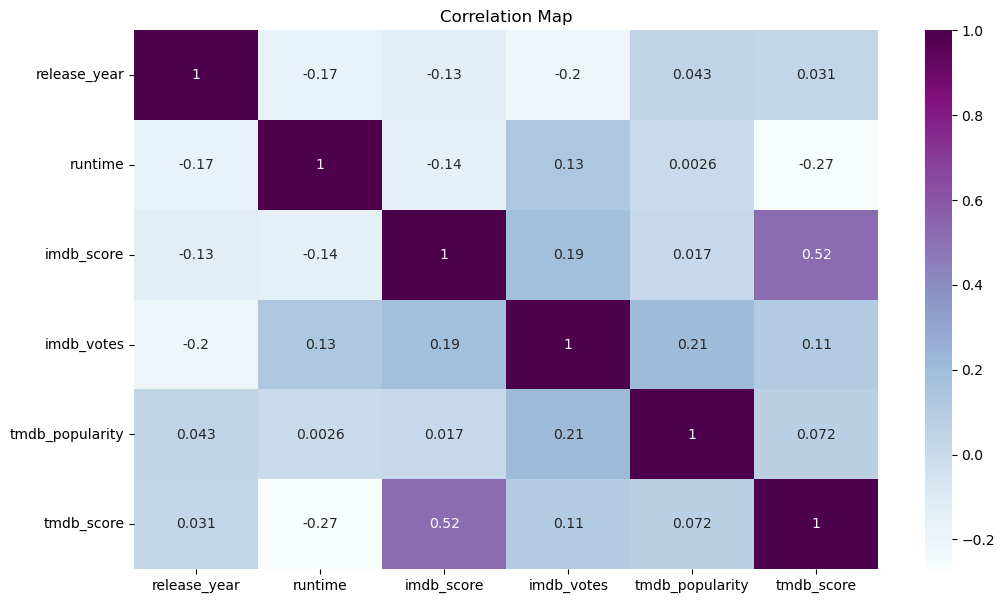

In [92]:
correlation=d.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, cmap="BuPu", annot= True)
plt.title("Correlation Map")
plt.show()

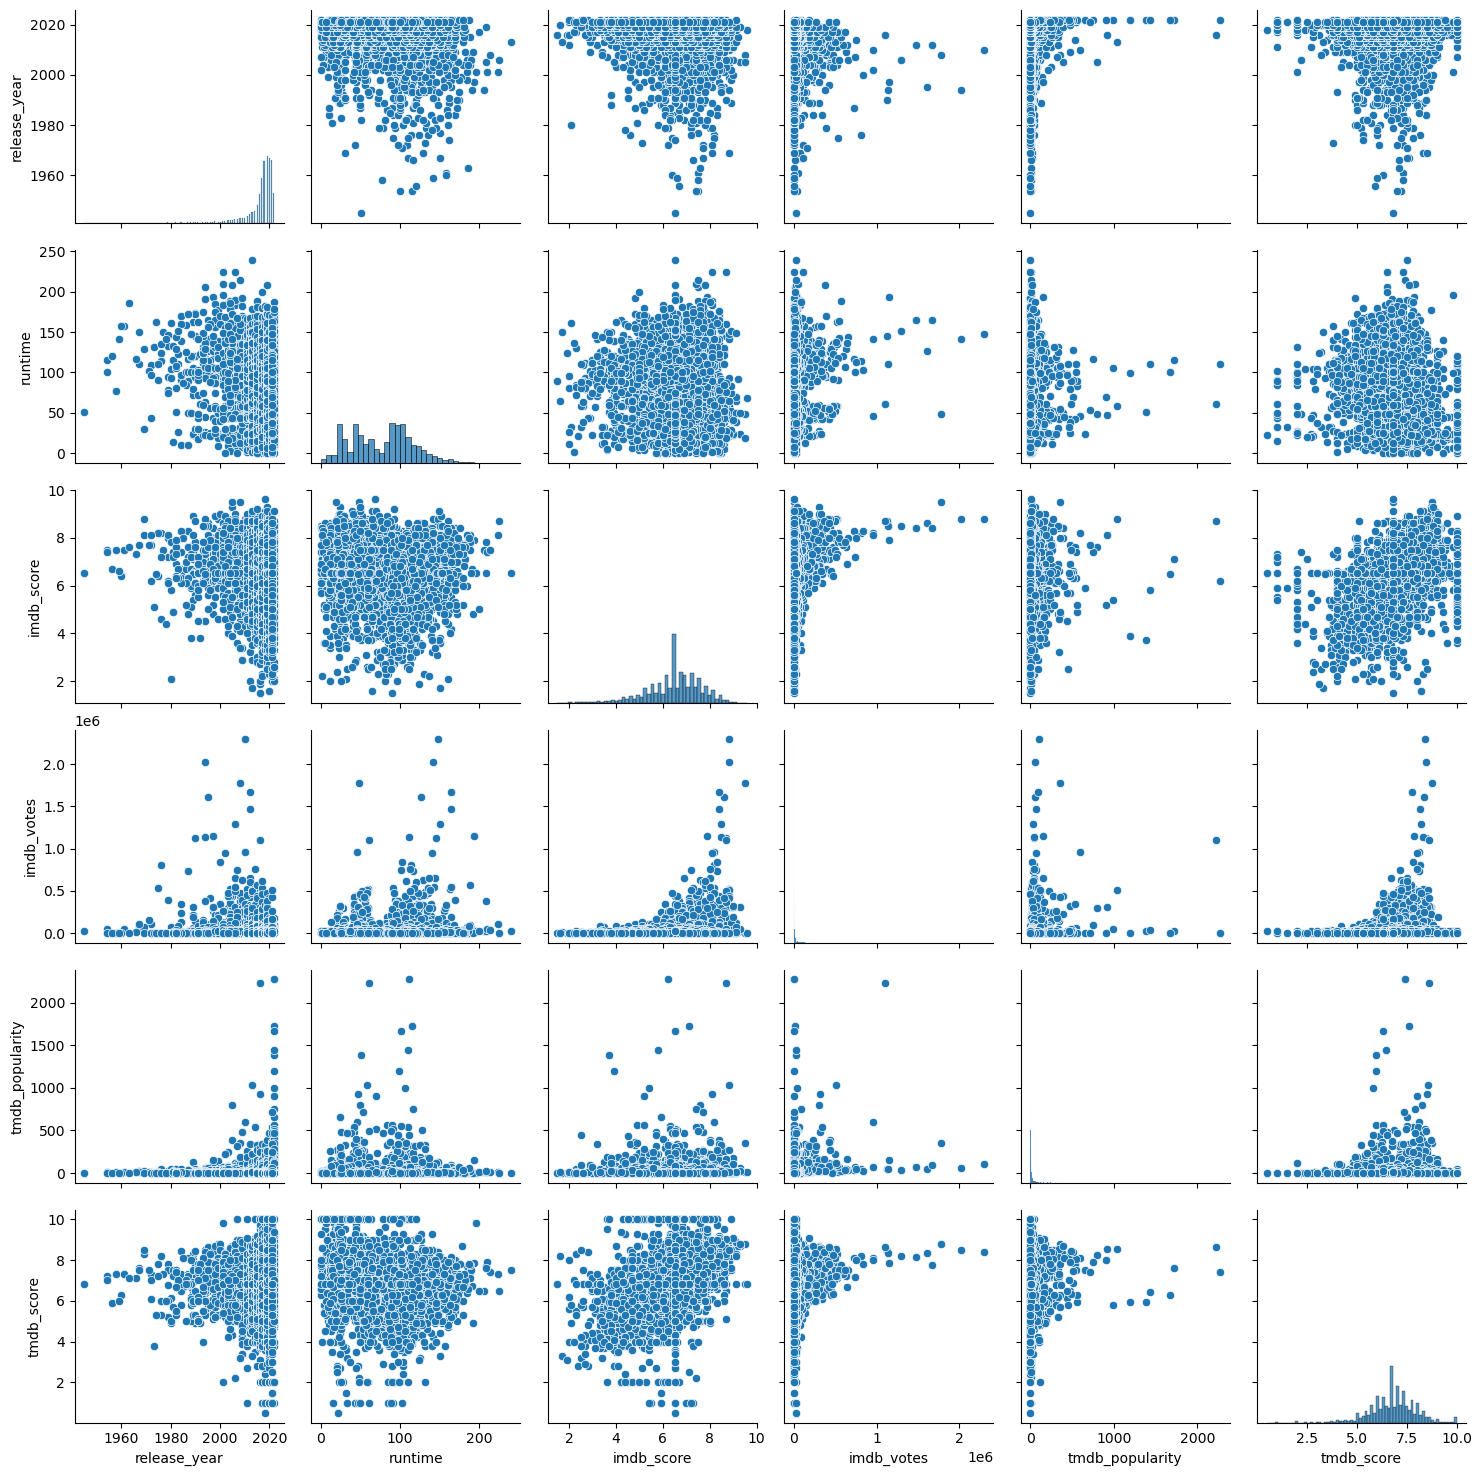

In [101]:
sns.pairplot(d)
plt.show()

# Distributions:

In [102]:
col=['runtime','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']

# A. Normal Distribution

In [104]:
import scipy.stats as stats

alpha=0.05
normality_results=[]
for column in col:

        # Perform the Shapiro-Wilk test
         statistic, p_value = stats.shapiro(d[column]) 
         is_normal = p_value > alpha
         if is_normal:
                normality_results.append(column) #prints columns with normal distribution
         else:
           print(column,"is not normal")
  

for i  in normality_results:
    print(i)

runtime is not normal
imdb_score is not normal
imdb_votes is not normal
tmdb_popularity is not normal
tmdb_score is not normal


## 1. Visualzing the distribution of IMDb rating

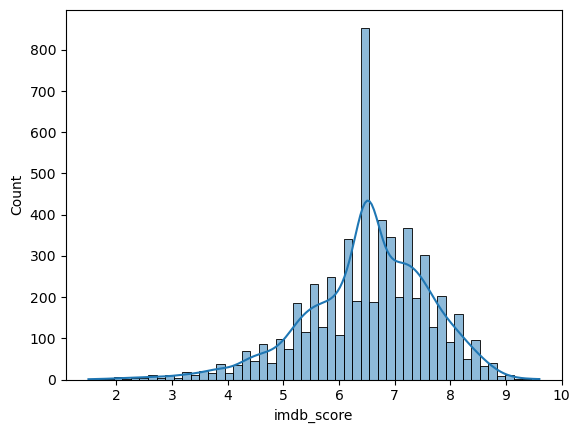

In [112]:
sns.histplot(d['imdb_score'],kde=True)
plt.show()

## 2. Plotting normal distribution over IMDb rating

<function matplotlib.pyplot.show(close=None, block=None)>

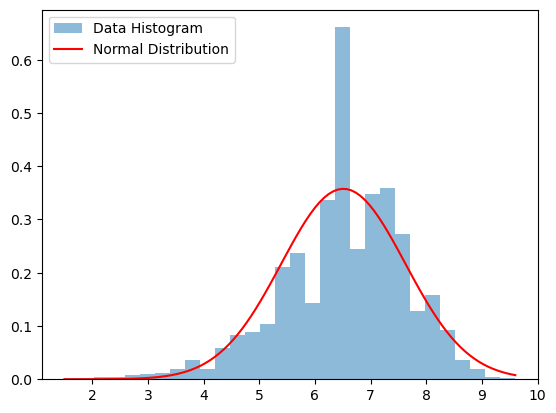

In [113]:
data = d['imdb_score']

# Visual inspection
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)), 'r-', label='Normal Distribution')
plt.legend()
plt.show

### As it can be visualized that the data is not following Normal Distribution

## 3. Checking skewedness of IMDb rating

In [118]:
# Check skewness
skewness = skew(data)
if skewness > 0:
    print(f"The data is right-skewed (positively skewed). Skewness value: {skewness:.2f}")
elif skewness < 0:
    print(f"The data is left-skewed (negatively skewed). Skewness value: {skewness:.2f}")
else:
    print("The data is approximately symmetric.")

The data is left-skewed (negatively skewed). Skewness value: -0.66


## Therefore the distribution of data is Left-Skewed distribution  

# B. Logarithmic Distribution

In [105]:
import scipy.stats as stats

alpha=0.05
normality_results=[]
for column in col:
        fit = stats.lognorm.fit(d[column])
        ks_statistic, p_value = stats.kstest(d[column], 'lognorm', args=fit)
        is_log= p_value > alpha
        if is_log:
                normality_results.append(column)
        else:
            print(column,"is not logarithmic")
for i  in normality_results:
    print(i)

runtime is not logarithmic
imdb_score is not logarithmic
imdb_votes is not logarithmic
tmdb_popularity is not logarithmic
tmdb_score is not logarithmic


# C. Exponential Distribution

In [106]:
import scipy.stats as stats

alpha=0.05
normality_results=[]
for column in col:
        # Perform the Shapiro-Wilk test
         fit = stats.expon.fit(d[column])
         ks_statistic, p_value = stats.kstest(d[column], 'expon', args=fit, alternative='greater')
         is_expo = p_value > alpha
         if is_expo:
                normality_results.append(column)
         else:
            print(column,"is not exponential distribution")
for i  in normality_results:
    print(i)

runtime is not exponential distribution
imdb_score is not exponential distribution
imdb_votes is not exponential distribution
tmdb_popularity is not exponential distribution
tmdb_score is not exponential distribution


# Hypothesis Testing

## 1. Normality test using Shapiro-Wilk Test : It tests if the data is normally distributed

Lets assume that the distribution  follows normal distribution 

In [121]:
data = d['imdb_score']

stat, p = shapiro(data)

print('stat=%.20f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.97427833080291748047, p=0.0000000000
Not a normal distribution


## 2. T-Test

### Comparing mean runtime of the types of shows: Movies and TV Shows

Lets assume mean runtime of Movies and TV Shows have no major difference

In [130]:
movies  = d.type[d.type == 1]  # Show type: Movie
tv_shows = d.type[d.type == 2] # Show type: TV Show

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(movies, tv_shows)

if p_value < 0.05:
    print("Reject the null hypothesis. The means of type of show: Movies and TV Shows are significantly different.")
else:
    print("Fail to reject the null hypothesis. No significant difference in type of show: Movies and TV Shows.")

Fail to reject the null hypothesis. No significant difference in type of show: Movies and TV Shows.
